### Objective 

In order to add a value which represents vegetation type we previously merged the World Database of Protected Areas maps with vegetation maps produced with CPTEC-PVM2 for present, RCP4.5 and RCP8.5, using QGIS

In [1]:
import geopandas as gpd
import fiona
import shapely

### Import Shapefile data

In [2]:
df=gpd.read_file("intersect_ens.shp")

In [3]:
df.head(20)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,presntVG,ENS45,ENS85_1000,ENS85_420,geometry
0,555555848.0,555555848,1,Musichi,Musichi,Distritos Regionales De Manejo Integrado,Integrated Management Regional District,National,VI,Not Applicable,...,State Verified,1861,CO-LAG,COL,COL,8,11,11,11,POLYGON ((-72.50846954199994 11.77778540000008...
1,309.0,309,1,Cerro Santa Ana,Cerro Santa Ana,Natural Monument,Natural Monument,National,III,Not Applicable,...,State Verified,285,VE-I,VEN,VEN,8,11,11,11,POLYGON ((-69.90081999999995 11.80974000000009...
2,2246.0,2246,1,Medanos de Coro,MÃ©danos de Coro,National Park,National Park,National,II,Not Applicable,...,State Verified,285,VE-I,VEN,VEN,8,11,11,11,"(POLYGON ((-69.46572575413612 11.3, -69.653754..."
3,30673.0,30673,1,Laguna de Boca de CaÃ±o,Laguna de Boca de CaÃ±o,Wildlife Refuge,Wildlife Refuge,National,IV,Not Applicable,...,State Verified,285,VE-I,VEN,VEN,8,11,11,11,POLYGON ((-69.82605999999993 11.90686000000005...
4,555592746.0,555592746,1,Bahia Portete Kaurrele,Bahia Portete Kaurrele,Parque Nacional Natural,Natural National Park,National,II,Not Applicable,...,State Verified,1861,CO-LAG Not Reported,COL,COL,8,13,6,6,POLYGON ((-71.89999999999999 12.28410604249185...
5,149.0,149,1,Macuira,Macuira,Parque Nacional Natural,Natural National Park,National,II,Not Applicable,...,State Verified,1861,CO-LAG,COL,COL,8,13,6,6,"POLYGON ((-71.36152724672695 12.1, -71.3 12.1,..."
6,2246.0,2246,1,Medanos de Coro,MÃ©danos de Coro,National Park,National Park,National,II,Not Applicable,...,State Verified,285,VE-I,VEN,VEN,8,6,6,6,POLYGON ((-69.90000000000001 11.63958309954254...
7,2246.0,2246,1,Medanos de Coro,MÃ©danos de Coro,National Park,National Park,National,II,Not Applicable,...,State Verified,285,VE-I,VEN,VEN,8,13,6,6,"POLYGON ((-69.75051562028544 11.7, -69.6999999..."
8,555592746.0,555592746,1,Bahia Portete Kaurrele,Bahia Portete Kaurrele,Parque Nacional Natural,Natural National Park,National,II,Not Applicable,...,State Verified,1861,CO-LAG Not Reported,COL,COL,8,6,6,8,POLYGON ((-71.89999999999999 12.18779408916287...
9,149.0,149,1,Macuira,Macuira,Parque Nacional Natural,Natural National Park,National,II,Not Applicable,...,State Verified,1861,CO-LAG,COL,COL,9,6,6,8,"POLYGON ((-71.3 12.17667507039294, -71.3 12.1,..."


#row data - too many information - too many columns... 

![](capturar.png)

### Creating GeoDataFrame with columns of interest 

###I am interested in distribution of vegetation types over states

In [4]:
vegtype=gpd.GeoDataFrame(df, columns =['ISO3', 'ENS45', 'ENS85_1000','ENS85_420','presntVG','geometry', 'REP_AREA' ])

In [5]:
vegtype.head(10)

,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA
0,COL,11,11,11,8,POLYGON ((-72.50846954199994 11.77778540000008...,14.944
1,VEN,11,11,11,8,POLYGON ((-69.90081999999995 11.80974000000009...,19.000
2,VEN,11,11,11,8,"(POLYGON ((-69.46572575413612 11.3, -69.653754...",912.800
3,VEN,11,11,11,8,POLYGON ((-69.82605999999993 11.90686000000005...,4.530
4,COL,13,6,6,8,POLYGON ((-71.89999999999999 12.28410604249185...,140.800
5,COL,13,6,6,8,"POLYGON ((-71.36152724672695 12.1, -71.3 12.1,...",250.000
6,VEN,6,6,6,8,POLYGON ((-69.90000000000001 11.63958309954254...,912.800
7,VEN,13,6,6,8,"POLYGON ((-69.75051562028544 11.7, -69.6999999...",912.800
8,COL,6,6,8,8,POLYGON ((-71.89999999999999 12.18779408916287...,140.800
9,COL,6,6,8,9,"POLYGON ((-71.3 12.17667507039294, -71.3 12.1,...",250.000


###values in columns **'ENS45',  'ENS85_1000',  'ENS85_420',  'presntVG'** represent 13 vegetation types (**1-13**)

### Calculate area for all polygons

In [6]:
selection = vegtype[0:10]

In [7]:
for index, row in selection.iterrows():
   ...:     poly_area = row['geometry'].area


In [8]:
vegtype['area'] = vegtype.area

In [9]:
vegtype['area'].head()

0    0.001239
1    0.002821
2    0.041887
3    0.007489
4    0.008248
Name: area, dtype: float64

##### Another way to calculate the area in square kilometers

In [10]:
tost = vegtype.copy()
tost["area"] = tost['geometry'].area/ 10**6
tost.head(2)

,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
0,COL,11,11,11,8,POLYGON ((-72.50846954199994 11.77778540000008...,14.944,1.238521e-09
1,VEN,11,11,11,8,POLYGON ((-69.90081999999995 11.80974000000009...,19.000,2.820519e-09


In [11]:
type(vegtype["geometry"])

geopandas.geoseries.GeoSeries

### Ploting  GeoDataFrame

In [12]:
import matplotlib.pyplot as plt

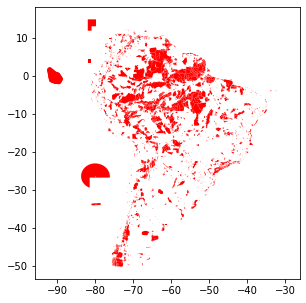

In [13]:
vegtype.plot( color='red',
            markersize=5, figsize=(5, 5) )

In [14]:
vegtype.size

45984

###still to many information-filtrate even more! 

### Selecting Brazil 

In [15]:
BRA = vegtype[vegtype["ISO3"] == 'BRA']

In [16]:
BRA.tail(2)

,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
5697,BRA,0,0,0,0,"POLYGON ((-52.59803316678418 -32.7, -52.509705...",109.386075,0.008111
5698,BRA,0,0,0,0,"POLYGON ((-52.59803316614516 -32.7, -52.509705...",109.386000,0.008111


In [29]:
BRA2 = BRA[BRA["presntVG"] == "1"]
BRA3 = BRA[BRA["ENS45"] == "1"]
BRA4 = BRA[BRA["ENS85_1000"] == "1"]
BRA2.tail(2)


,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area


In [37]:
BRA2.tail(2)

,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area


In [38]:
BRA4.head(2)

,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
492,BRA,1,1,13,1,POLYGON ((-52.19403279296466 3.300000000000001...,38651.295014,1.384051
496,BRA,1,1,13,1,(POLYGON ((-51.97680730591104 2.90000000000000...,23703.083980,0.254960


In [32]:
###something is wrong with columns 'ENS85_1000',  'ENS85_420',  'presntVG'** ?

In [39]:
BRA2 = BRA[BRA["presntVG"] == 1]
BRA2.tail(2)

,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
4796,BRA,6,6,6,1,POLYGON ((-53.74915828199994 -23.1617072259999...,90.961000,0.000099
4797,BRA,6,6,6,1,POLYGON ((-52.83977532299991 -23.8584241609999...,87.161262,0.007725


In [40]:
BRA4.tail(2)

,ISO3,ENS45,ENS85_1000,ENS85_420,presntVG,geometry,REP_AREA,area
4781,BRA,6,1,6,1,POLYGON ((-49.06991791799993 -24.0767770359999...,0.992345,0.000088
4790,BRA,6,1,6,1,POLYGON ((-50.7278177629999 -24.02505063899991...,8.599098,0.000747


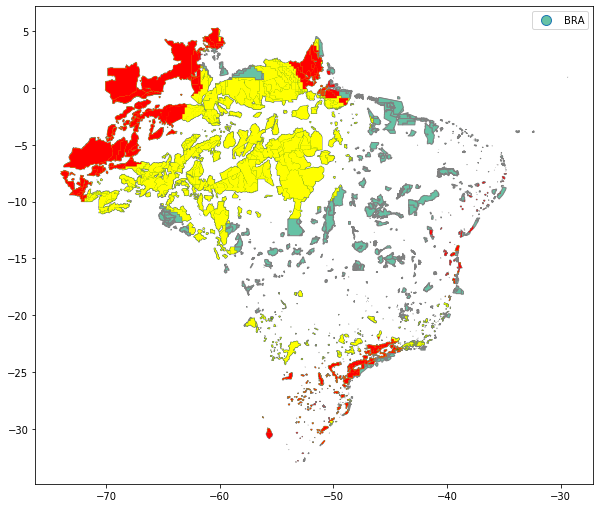

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
BRA.plot( ax=ax, cmap='Set2', column='ISO3', edgecolor='gray', legend=True)
BRA2.plot( ax=ax, color='green',markersize=5 )
BRA3.plot( ax=ax, color='yellow',markersize=5  )
BRA4.plot( ax=ax, color='red',markersize=5  )

###Saving BRA GeoDataFrame as Shapefile use command 
                                        --> BRA.to_file("BRA.shp")

### Group based on scenarios  

In [24]:
BRA.groupby('presntVG')[['area']].sum() 

,area
presntVG,
0,7.130844
1,178.351734
6,28.433885
8,4.215974
13,9.841729


In [25]:
BRA.groupby('ENS45')[['area']].sum()

,area
ENS45,
0,7.130844
1,50.942743
11,1.591072
13,43.075943
6,122.841152
8,2.392411


In [26]:
BRA.groupby('ENS85_1000')[['area']].sum()

,area
ENS85_1000,
0,7.130844
1,66.581917
6,131.718816
8,0.602890
11,1.591072
13,20.348627


In [27]:
BRA.groupby('ENS85_420')[['area']].sum()

,area
ENS85_420,
0,7.130844
1,6.329586
6,88.038878
8,56.557043
11,1.591072
13,68.326743


In [ ]:
### counting!?

In [44]:
qqnome=BRA.groupby('ENS85_1000').count()
qqnome.head()

,ISO3,ENS45,ENS85_420,presntVG,geometry,REP_AREA,area
ENS85_1000,,,,,,,
0,259,259,259,259,259,259,259
1,745,745,745,745,745,745,745
6,1526,1526,1526,1526,1526,1526,1526
8,6,6,6,6,6,6,6
11,87,87,87,87,87,87,87


In [45]:
qqnome=BRA.groupby('ENS85_1000').sum()
qqnome.head()

,ENS85_420,presntVG,REP_AREA,area
ENS85_1000,,,,
0,0,0,2.291788e+05,7.130844
1,4101,1672,1.837731e+06,66.581917
6,10034,5063,3.837144e+06,131.718816
8,48,49,3.206857e+04,0.602890
11,957,366,2.323445e+05,1.591072


In [46]:
qqnome=BRA.groupby('ENS85_420').sum()
qqnome.head()

,ENS85_1000,presntVG,REP_AREA,area
ENS85_420,,,,
0,0,0,2.291788e+05,7.130844
1,400,882,1.049550e+05,6.329586
6,7860,4275,2.922131e+06,88.038878
8,2770,1733,1.601353e+06,56.557043
11,957,366,2.323445e+05,1.591072
